In [1]:
#import packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('bank.xlsx') #Read excel file

In [2]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df['y'].value_counts()

,count
y,
no,4000
yes,521


In [5]:
df['target'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0)  # Convert to numeric
df = df.drop('y',axis=1)

df['target'] = pd.to_numeric(df['target'], errors="coerce") #add

In [6]:
df['target'] #add

,target
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


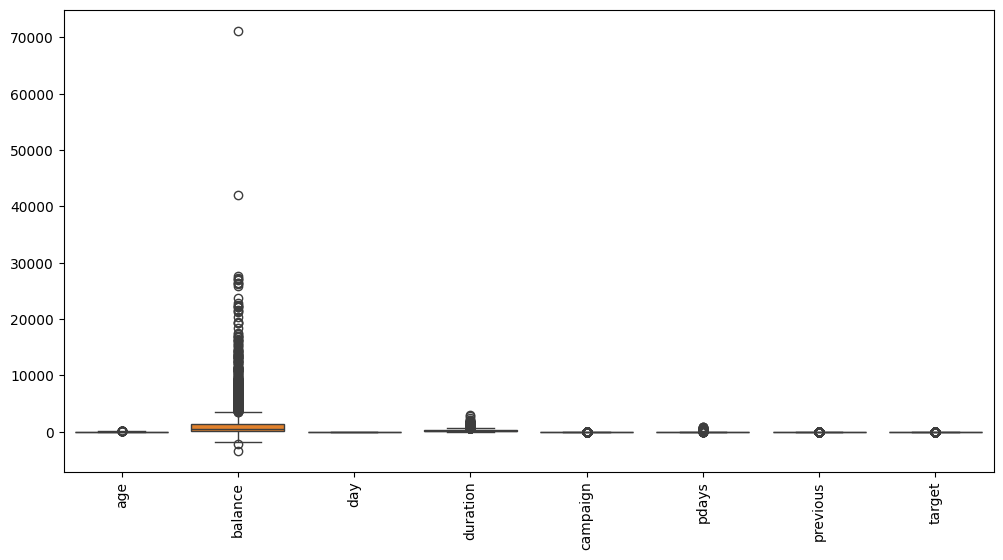

In [7]:
# box plots to check outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

[   1   10   16   25   30   38   40   49   62   64   72   93   94   96
  102  103  117  129  139  153  161  174  176  182  194  196  199  210
  213  221  238  241  242  258  262  272  276  278  290  292  294  300
  308  310  325  339  343  358  364  367  368  378  381  382  386  397
  399  400  412  414  427  440  450  456  468  470  473  477  496  497
  500  504  519  525  540  548  554  561  567  602  619  620  621  626
  631  647  650  669  670  679  682  686  688  696  707  709  714  717
  744  787  790  822  837  839  846  848  864  866  871  874  875  877
  889  892  899  900  915  922  924  926  928  939  954  963  967  969
  973  991 1005 1010 1021 1031 1039 1056 1067 1069 1099 1102 1113 1115
 1118 1119 1121 1122 1132 1140 1150 1166 1177 1179 1196 1203 1206 1208
 1211 1216 1228 1239 1257 1263 1265 1276 1300 1306 1312 1326 1375 1383
 1393 1407 1412 1422 1429 1433 1446 1451 1457 1470 1478 1480 1483 1489
 1492 1496 1512 1530 1535 1548 1553 1562 1574 1585 1592 1600 1603 1606
 1609 

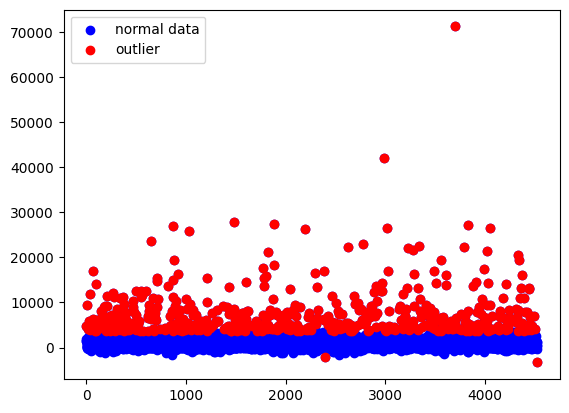

In [8]:
data = df['balance']
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = np.where((data < lower_bound) | (data > upper_bound))[0]
print(outliers_iqr)

# IQR result
plt.scatter(range(len(data)), data, c='blue', label='normal data')
plt.scatter(outliers_iqr, data[outliers_iqr], c='red', label='outlier')
plt.legend()
plt.show()

In [9]:
# considering the significant information of some outliers of 'balance'and considering the biased influence on woe featuring engineer, I just delete the value > 40000
df = df[df['balance'] <= 40000]

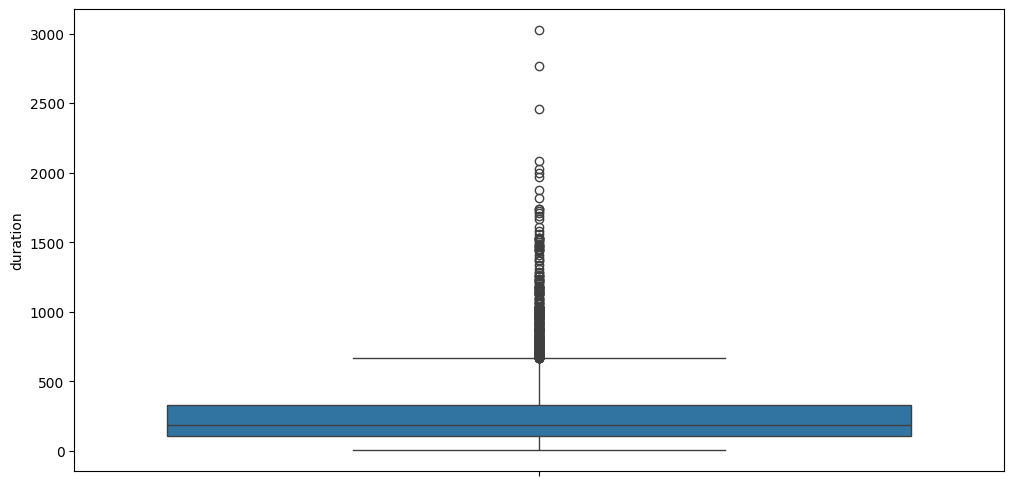

In [10]:
# box plots to check outlier
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['duration'])
plt.xticks(rotation=90)
plt.show()

In [13]:
# considering the significant information of some outliers of 'duration'and considering the biased influence on woe featuring engineer, I just delete the value > 2500
df = df[df['duration'] <= 2000]

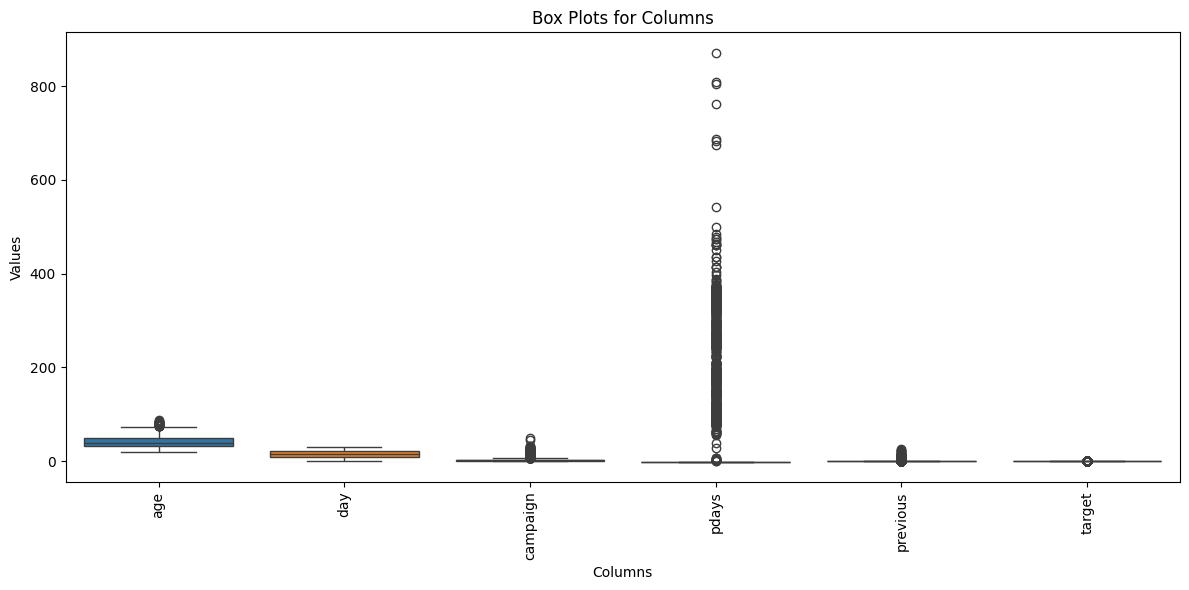

In [17]:
# box plots to check outlier
columns_to_plot = [col for col in df.columns if col != 'balance' and col != 'duration']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=90)
plt.title('Box Plots for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

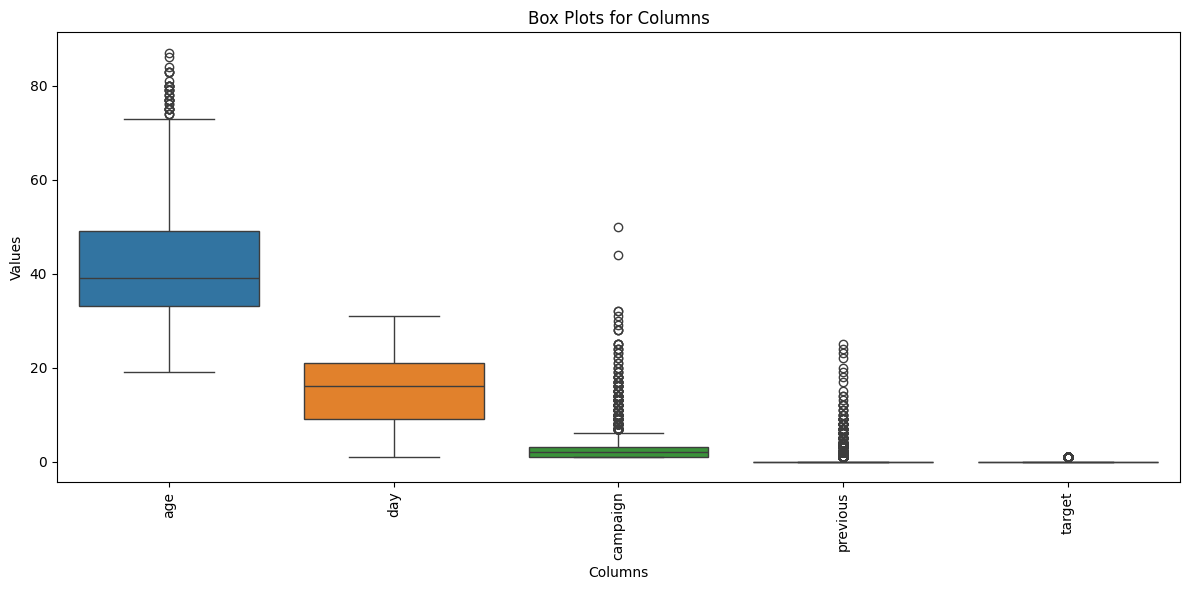

In [18]:
# box plots to check outlier
columns_to_plot = [col for col in df.columns if col != 'balance' and col != 'duration' and col != 'pdays']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=90)
plt.title('Box Plots for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [19]:
# considering the significant information of some outliers of 'campaign'and considering the biased influence on woe featuring engineer, I just delete the value > 40
df = df[df['campaign'] <= 40]

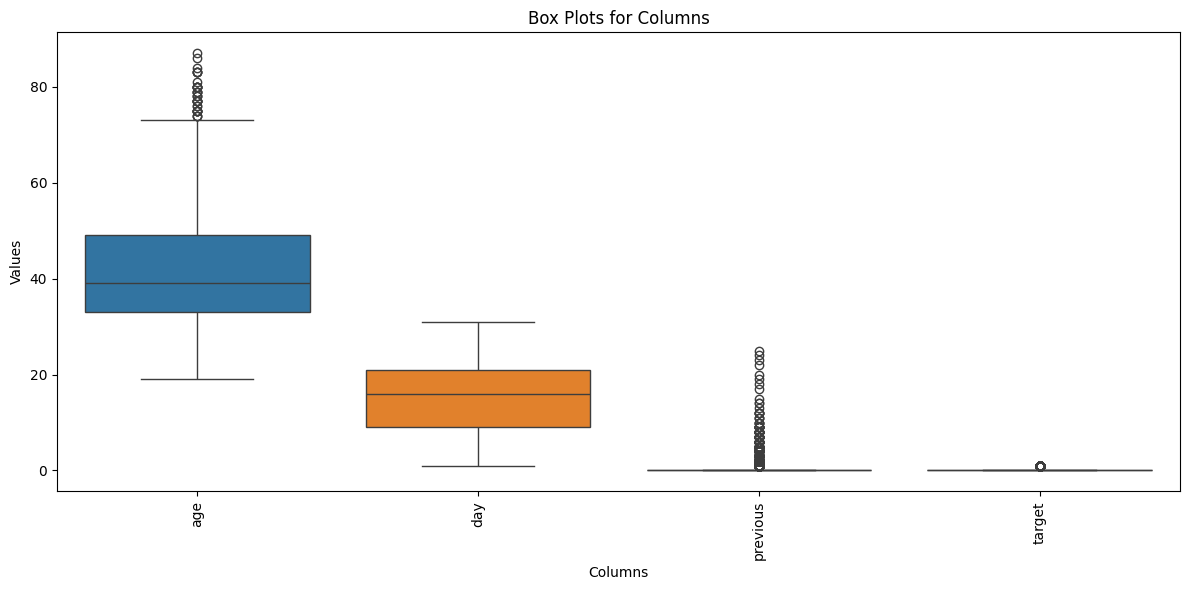

In [20]:
# box plots to check outlier
columns_to_plot = [col for col in df.columns if col != 'balance' and col != 'duration' and col != 'pdays'and col != 'campaign']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_plot])
plt.xticks(rotation=90)
plt.title('Box Plots for Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


# WOE and IV

In [22]:
# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
from scipy.stats import spearmanr #change
import re
import traceback
import string


max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True, observed=False) ## change
            r, p = spearmanr(d2.mean().X, d2.mean().Y)  # Correct function usage
            n = n - 1
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin
        bins = notmiss.X.quantile(np.linspace(0, 1, n))  ## change
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)})
        d2 = d1.groupby('Bucket', as_index=True, observed=False) ## change

    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)  ## change

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()

    return(d3)

def char_bin(Y, X):

    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    df2 = notmiss.groupby('X',as_index=True)

    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y

    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = pd.concat([d3, d4], ignore_index=True)  ##change

    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)

    return(d3)

def data_vars(df1, target):

    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]

    x = df1.dtypes.index
    count = -1

    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1

            if count == 0:
                iv_df = conv
            else:
                iv_df = pd.concat([iv_df, conv], ignore_index=True)   ## change

    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [23]:
print(df.columns)  # Show all column names


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')


In [24]:
final_iv, IV = data_vars(df,df.target)

In [25]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,age,19,39,2288,258,0.112762,2030,0.887238,0.499033,0.508135,-0.018076,0.000331
1,age,40,87,2224,259,0.116457,1965,0.883543,0.500967,0.491865,0.018337,0.000331
2,job,admin.,admin.,478,58,0.121339,420,0.878661,0.112186,0.105131,0.064944,0.136215
3,job,blue-collar,blue-collar,943,68,0.072110,875,0.927890,0.131528,0.219024,-0.509960,0.136215
4,job,entrepreneur,entrepreneur,166,14,0.084337,152,0.915663,0.027079,0.038048,-0.340067,0.136215
...,...,...,...,...,...,...,...,...,...,...,...,...
63,previous,2,25,530,133,0.250943,397,0.749057,0.257253,0.099374,0.951169,0.180599
64,poutcome,failure,failure,490,63,0.128571,427,0.871429,0.121857,0.106884,0.131107,0.468239
65,poutcome,other,other,197,38,0.192893,159,0.807107,0.073501,0.039800,0.613438,0.468239
66,poutcome,success,success,129,83,0.643411,46,0.356589,0.160542,0.011514,2.634955,0.468239


In [26]:
IV.sort_values('IV')

,VAR_NAME,IV
5,default,0.000024
0,age,0.000331
4,day,0.003644
2,campaign,0.023168
7,education,0.031209
11,marital,0.039336
10,loan,0.063109
1,balance,0.079038
8,housing,0.107660
9,job,0.136215


In [27]:
IV.to_csv('test.csv')

# Apply WOE values to your dataframe columns

The below code snippet can be used to apply the WOE values to your dataframe columns.

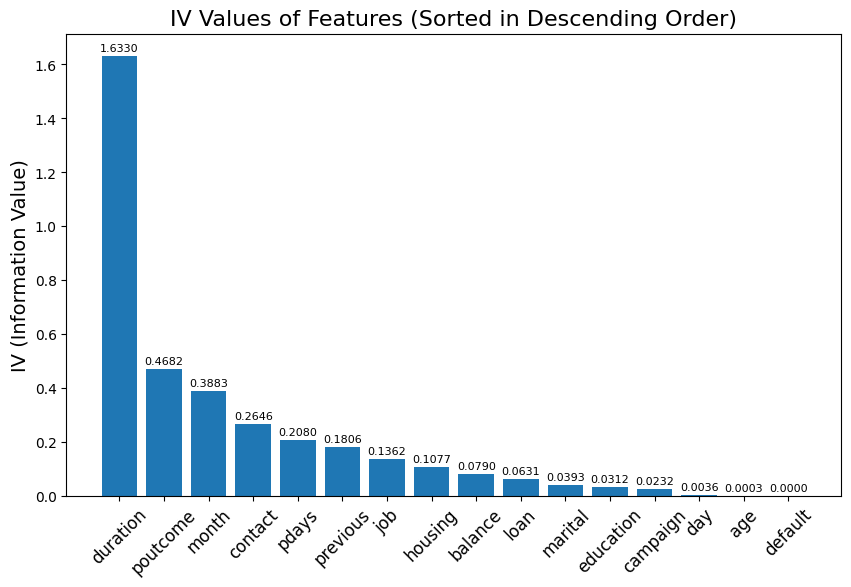

In [28]:

# Sort IV values in descending order
IV_sorted = IV.sort_values(by="IV", ascending=False)


IVindex = IV_sorted["VAR_NAME"].tolist()  # X-axis variable names
ivlist = IV_sorted["IV"].tolist()  # Y-axis IV values


fig1, ax1 = plt.subplots(figsize=(10, 6))
x = np.arange(len(IVindex)) + 1
ax1.bar(x, ivlist, width=0.8)


ax1.set_xticks(x)
ax1.set_xticklabels(IVindex, rotation=45, fontsize=12)
ax1.set_ylabel('IV (Information Value)', fontsize=14)
ax1.set_title('IV Values of Features (Sorted in Descending Order)', fontsize=16)

for a, b in zip(x, ivlist):
    ax1.text(a, b + 0.01, f'{b:.4f}', ha='center', va='bottom', fontsize=8)

plt.show()


In [30]:
#sinc VI of default is 0
print(df['default'].value_counts())
final_iv[final_iv['VAR_NAME'] == 'default']

default
no     4436
yes      76
Name: count, dtype: int64


,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
21,default,no,no,4436,508,0.114518,3928,0.885482,0.982592,0.983229,-0.000648,0.000024
22,default,yes,yes,76,9,0.118421,67,0.881579,0.017408,0.016771,0.037288,0.000024


*IV* = 0.000024 → Almost 0, meaning the variable has no predictive power.

In [31]:
# List of variables to drop
drop_vars = ['default', 'age', 'day', 'campaign']

df.drop(columns=drop_vars, inplace=True)

print("Removed variables:", drop_vars)


Removed variables: ['default', 'age', 'day', 'campaign']


In [32]:
#> 0.5, suspicious relationship (Check once)
print(df[['duration', 'target']].corr())


          duration    target
duration  1.000000  0.400506
target    0.400506  1.000000


In [33]:
print(df.groupby('target')['duration'].describe())


         count        mean         std   min    25%    50%    75%     max
target                                                                   
0       3995.0  225.750188  205.689496   4.0   96.5  167.0  283.0  1994.0
1        517.0  538.951644  357.799058  30.0  260.0  441.0  743.0  1971.0


In [34]:
# This confirms that duration is strongly correlated with the outcome (y), meaning it’s likely determined after the event happens
df.drop(columns=['duration'], inplace=True)

In [35]:
transform_vars_list = df.columns.difference(['target'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [36]:
transform_vars_list

Index(['balance', 'contact', 'education', 'housing', 'job', 'loan', 'marital',
       'month', 'pdays', 'poutcome', 'previous'],
      dtype='object')

In [37]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd))
        except:
            df[transform_prefix + var] = df[var].apply(lambda x: eval(replace_cmd1))

In [38]:
df['contact'].value_counts()

,count
contact,
cellular,2890
unknown,1321
telephone,301


In [39]:
df['new_contact'].value_counts()

,count
new_contact,
0.259039,2890
-1.036046,1321
0.279870,301


In [40]:
small_df = final_iv[final_iv['VAR_NAME'] == 'contact']

In [41]:
small_df

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
31,contact,cellular,cellular,2890,415,0.143599,2475,0.856401,0.802708,0.619524,0.259039,0.264578
32,contact,telephone,telephone,301,44,0.146179,257,0.853821,0.085106,0.064330,0.279870,0.264578
33,contact,unknown,unknown,1321,58,0.043906,1263,0.956094,0.112186,0.316145,-1.036046,0.264578


In [42]:
# Display all WOE-transformed columns
woe_cols = [col for col in df.columns if col.startswith(transform_prefix)]
print(df[woe_cols].head())


   new_balance  new_contact  new_education  new_housing   new_job  new_loan  \
0     0.322616     0.259039      -0.227206     0.331832 -0.126493  0.091952   
1     0.322616     0.259039      -0.088537    -0.327372 -0.255194 -0.689921   
2     0.163193     0.259039       0.244308    -0.327372  0.181272  0.091952   
3     0.163193    -1.036046       0.244308    -0.327372  0.181272 -0.689921   
4    -0.367696    -1.036046      -0.088537    -0.327372 -0.509960  0.091952   

   new_marital  new_month  new_pdays  new_poutcome  new_previous  
0    -0.168501   1.918004  -0.267690     -0.267690     -0.192735  
1    -0.168501  -0.607414   0.799873      0.131107      0.951169  
2     0.226407   0.602048   0.799873      0.131107     -0.192735  
3    -0.168501  -0.150370  -0.267690     -0.267690     -0.192735  
4    -0.168501  -0.607414  -0.267690     -0.267690     -0.192735  


In [43]:
df

,job,marital,education,balance,housing,loan,contact,month,pdays,previous,...,new_contact,new_education,new_housing,new_job,new_loan,new_marital,new_month,new_pdays,new_poutcome,new_previous
0,unemployed,married,primary,1787,no,no,cellular,oct,-1,0,...,0.259039,-0.227206,0.331832,-0.126493,0.091952,-0.168501,1.918004,-0.267690,-0.267690,-0.192735
1,services,married,secondary,4789,yes,yes,cellular,may,339,4,...,0.259039,-0.088537,-0.327372,-0.255194,-0.689921,-0.168501,-0.607414,0.799873,0.131107,0.951169
2,management,single,tertiary,1350,yes,no,cellular,apr,330,1,...,0.259039,0.244308,-0.327372,0.181272,0.091952,0.226407,0.602048,0.799873,0.131107,-0.192735
3,management,married,tertiary,1476,yes,yes,unknown,jun,-1,0,...,-1.036046,0.244308,-0.327372,0.181272,-0.689921,-0.168501,-0.150370,-0.267690,-0.267690,-0.192735
4,blue-collar,married,secondary,0,yes,no,unknown,may,-1,0,...,-1.036046,-0.088537,-0.327372,-0.509960,0.091952,-0.168501,-0.607414,-0.267690,-0.267690,-0.192735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,-333,yes,no,cellular,jul,-1,0,...,0.259039,-0.088537,-0.327372,-0.255194,0.091952,-0.168501,-0.327044,-0.267690,-0.267690,-0.192735
4517,self-employed,married,tertiary,-3313,yes,yes,unknown,may,-1,0,...,-1.036046,0.244308,-0.327372,-0.053262,-0.689921,-0.168501,-0.607414,-0.267690,-0.267690,-0.192735
4518,technician,married,secondary,295,no,no,cellular,aug,-1,0,...,0.259039,-0.088537,0.331832,-0.077944,0.091952,-0.168501,0.098846,-0.267690,-0.267690,-0.192735
4519,blue-collar,married,secondary,1137,no,no,cellular,feb,211,3,...,0.259039,-0.088537,0.331832,-0.509960,0.091952,-0.168501,0.467406,0.799873,0.613438,0.951169
